In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from matplotlib.image import imread

In [2]:
import os

In [3]:
os.listdir("./images/")

['parasect.png',
 'lumineon.png',
 'raikou.png',
 'dedenne.png',
 'pyroar.png',
 'articuno.png',
 'magmortar.png',
 'bulbasaur.png',
 'banette.png',
 'staraptor.png',
 'pidove.png',
 'comfey.png',
 'taillow.png',
 'charizard.png',
 'infernape.png',
 'sandshrew.png',
 'marshadow.png',
 'alakazam.png',
 'lickitung.png',
 'starmie.png',
 'yanmega.png',
 'yveltal.png',
 'zigzagoon.png',
 'thundurus-incarnate.png',
 'petilil.png',
 'torterra.png',
 'purugly.png',
 'cresselia.png',
 'regigigas.png',
 'palkia.png',
 'froakie.png',
 'munna.png',
 'bellossom.png',
 'gabite.png',
 'tapu-koko.png',
 'mareep.png',
 'shieldon.png',
 'stoutland.png',
 'accelgor.png',
 'makuhita.png',
 'seviper.png',
 'tirtouga.png',
 'lampent.png',
 'tornadus-incarnate.png',
 'nidoking.png',
 'huntail.png',
 'nosepass.png',
 'carracosta.png',
 'nidoqueen.png',
 'inkay.png',
 'archeops.png',
 'avalugg.png',
 'grubbin.png',
 'sentret.png',
 'golbat.png',
 'skorupi.png',
 'conkeldurr.png',
 'jellicent.png',
 'hoopa-con

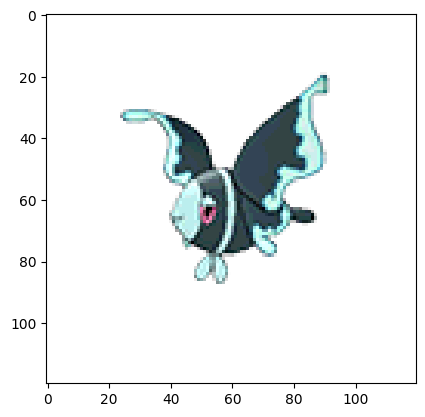

In [9]:
plt.imshow(imread("./images/lumineon.png"))

In [10]:
imread("./images/lumineon.png").shape

(120, 120, 4)

In [11]:
data = pd.read_csv("pokemon.csv")

In [14]:
data['Type1'].value_counts()

Type1
Water       114
Normal      105
Grass        78
Bug          72
Fire         53
Psychic      53
Rock         46
Electric     40
Poison       34
Ground       32
Dark         29
Fighting     29
Ghost        27
Dragon       27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: count, dtype: int64

In [17]:
data['Type1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [16]:
data['Name'].nunique()

809

In [18]:
dic = {}

In [19]:
unique_types = data['Type1'].unique()

In [23]:
np.argmax(unique_types=='Fire')

1

In [24]:
images_list = os.listdir("./images/")

In [25]:
len(images_list)

809

In [26]:
n_types = data['Type1'].nunique()

In [32]:
np.zeros((18,))[0]

0.0

In [38]:
X = []
y = []
for i in images_list:
    X.append(imread("./images//"+i))
    dum = np.zeros((n_types,))
    # print(i)
    # print(data.loc[data['Name']==i[:-4],'Type1'].values[0])
    dum[np.argmax(unique_types==data.loc[data['Name']==i[:-4],'Type1'].values[0])] = 1
    y.append(dum)

In [39]:
X = np.array(X)
y = np.array(y)

In [54]:
X[0].shape

(120, 120, 4)

In [42]:
y.shape

(809, 18)

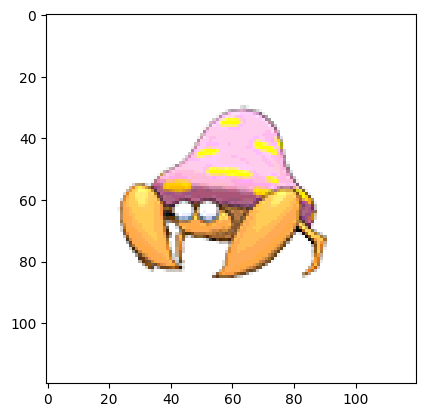

In [43]:
plt.imshow(X[0])

In [48]:
for i in range(1,10):
    print(unique_types[np.argmax(y[-i])])

Dragon
Poison
Psychic
Dragon
Water
Water
Fire
Normal
Rock


In [51]:
X_train, y_train, X_test, y_test = X[:-10],y[:-10],X[-10:],y[-10:] 

In [52]:
from tensorflow.keras.models import Sequential

2024-04-07 23:42:49.578642: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [53]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten

In [57]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size=(4,4), input_shape = (120, 120, 4), activation = 'relu'))
model.add(MaxPool2D())

model.add(Conv2D(filters = 64, kernel_size=(4,4), input_shape = (120, 120, 4), activation = 'relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))

model.add(Dense(units = n_types, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 117, 117, 64)      4160      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 58, 58, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 55, 55, 64)        65600     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 46656)             0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop = EarlyStopping(monitor='val_loss', patience = 5)

In [64]:
model.fit(X_train,y_train, epochs = 10, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/10
25/25 [==============================] - 32s 1s/step - loss: 0.6720 - accuracy: 0.7972 - val_loss: 4.4815 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 31s 1s/step - loss: 0.2086 - accuracy: 0.9474 - val_loss: 5.3552 - val_accuracy: 0.2000
Epoch 3/10
25/25 [==============================] - 27s 1s/step - loss: 0.0648 - accuracy: 0.9800 - val_loss: 6.7294 - val_accuracy: 0.1000
Epoch 4/10
25/25 [==============================] - 26s 1s/step - loss: 0.0176 - accuracy: 0.9987 - val_loss: 6.6103 - val_accuracy: 0.1000
Epoch 5/10
25/25 [==============================] - 27s 1s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 7.0460 - val_accuracy: 0.1000
Epoch 6/10
25/25 [==============================] - 26s 1s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 7.0140 - val_accuracy: 0.1000


In [104]:
unique_types[np.argmax(model.predict(np.array([X_test[9]])))]

1/1 [==============================] - 0s 45ms/step


'Ghost'

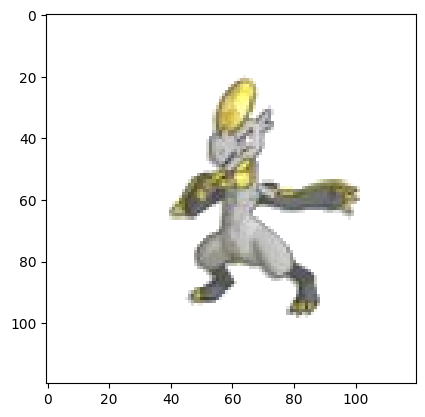

In [105]:
plt.imshow(X_test[9])

In [71]:
input_shape = X_test[0].shape

In [72]:
np.array([X_test[0]]).shape

(1, 120, 120, 4)

In [106]:
unique_types[np.argmax(y_test[9])]

'Dragon'